# **Analyse, transform, and evaluate the data downloaded**

In [3]:
from extract_data.export import get_country_gauge_coords
from extract_data.plots import get_custom_palette
from extract_data.plots import set_plot_style
from extract_data.plots import map_gauge_coordinates_of_country
from extract_data.plots import plot_danger_levels_hist
from extract_data.plots import plot_gauge_forecast_for_issue_time
from extract_data.plots import plot_week_of_gauge_forecast_for_issue_time
from extract_data.plots import plot_x_days_of_gauge_forecast_for_issue_time

In [4]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
def import_country_data(country: str) -> pd.DataFrame:
    """
    Imports three pieces of data for a given country:
    - metadata per country (eg containing the gauges and their coordinates)
    - metadata per gauge (eg containing the danger levels)
    - forecast data per gauge
    """
    df_gauges = pd.read_csv(
        f"../data/processed/gauge_metadata_per_country/gauge_meta_{country}.csv",
        sep = ';',
        decimal = '.',
        encoding = 'utf-8'
    )
    df_gauge_meta = pd.read_csv(
        f"../data/processed/metadata/metadata_gauges_{country}.csv",
        sep = ';',
        decimal = '.',
        encoding = 'utf-8'
    )
    df_forecasts = pd.read_csv(
        "../data/floods-data/mali/2024-07-08_to_2024-10-08.csv", 
        index_col = 0,
        sep = ';',
        decimal = '.',
        encoding = 'utf-8'
    )

    return df_gauges, df_gauge_meta, df_forecasts

In [6]:
df_Mali_gauges, df_Mali_gauge_models, df_Mali_forecasts = import_country_data('Mali')
df_Kenya_gauges, df_Kenya_gauge_models, df_Kenya_forecasts = import_country_data('Kenya')
df_Zambia_gauges, df_Zambia_gauge_models, df_Zambia_forecasts = import_country_data('Zambia')

In [7]:
print(len(df_Mali_gauges), len(df_Mali_gauge_models), len(df_Mali_forecasts))
print(len(df_Kenya_gauges), len(df_Kenya_gauge_models), len(df_Kenya_forecasts))
print(len(df_Zambia_gauges), len(df_Zambia_gauge_models), len(df_Zambia_forecasts))

16 16 11776
3 3 11776
46 46 11776


In [8]:
df_Mali_gauge_models

,siteName,source,river,gaugeId,qualityVerified,latitude,longitude
0,NaN,HYBAS,NaN,hybas_1120758950,True,11.427083,-6.581250
1,NaN,HYBAS,Sankarani,hybas_1120766460,True,11.222917,-8.485417
2,NaN,HYBAS,NaN,hybas_1120739110,True,11.977083,-6.360417
3,NaN,HYBAS,NaN,hybas_1120679780,True,13.493750,-6.202083
4,NaN,HYBAS,NaN,hybas_1121893090,True,14.131250,-5.039583
5,NaN,HYBAS,NaN,hybas_1120641660,True,14.506250,-4.206250
6,NaN,HYBAS,NaN,hybas_1121895840,True,13.956250,-5.360417
7,NaN,HYBAS,NaN,hybas_1120650110,True,14.277083,-6.927083
8,NaN,HYBAS,Niger,hybas_1121919510,True,12.410417,-8.106250
9,NaN,HYBAS,NaN,hybas_1120689830,True,13.210417,-7.077083


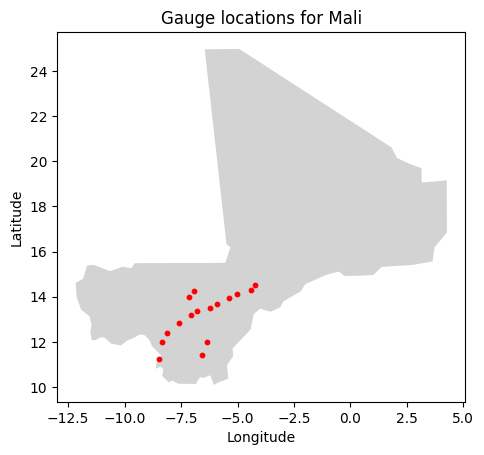

In [9]:
map_gauge_coordinates_of_country(
    df_Mali_gauge_models, 'Mali'
)

##### **Identify the gauges near the Niger river:**

In [10]:
df_Mali_gauge_coords = get_country_gauge_coords(df_Mali_gauge_models)
print(df_Mali_gauge_coords)

                   latitude  longitude
gaugeId                               
hybas_1120758950  11.427083  -6.581250
hybas_1120766460  11.222917  -8.485417
hybas_1120739110  11.977083  -6.360417
hybas_1120679780  13.493750  -6.202083
hybas_1121893090  14.131250  -5.039583
hybas_1120641660  14.506250  -4.206250
hybas_1121895840  13.956250  -5.360417
hybas_1120650110  14.277083  -6.927083
hybas_1121919510  12.410417  -8.106250
hybas_1120689830  13.210417  -7.077083
hybas_1120737100  12.018750  -8.322917
hybas_1120705070  12.835417  -7.581250
hybas_1121890140  14.314583  -4.422917
hybas_1121905290  13.360417  -6.789583
hybas_1121900350  13.685417  -5.893750
hybas_1120661040  13.985417  -7.152083


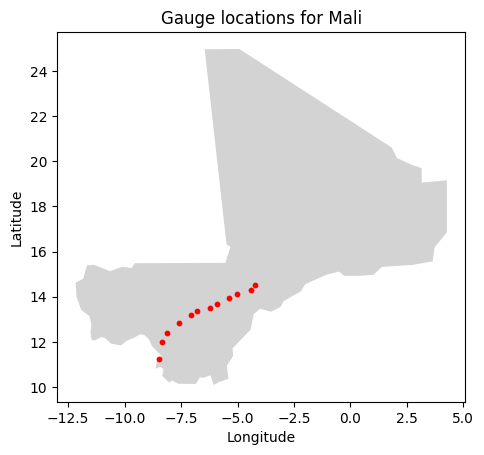

In [11]:
gauges_not_near_Niger = [
    'hybas_1120739110',
    'hybas_1120758950',
    'hybas_1120650110',
    'hybas_1120661040'
]

df_Mali_gauges_Niger = \
    df_Mali_gauge_models[~df_Mali_gauge_models['gaugeId'].isin(gauges_not_near_Niger)].copy()

map_gauge_coordinates_of_country(
    df_Mali_gauges_Niger, 'Mali'
)

In [12]:
df_Mali_gauges_Niger = df_Mali_gauges_Niger.sort_values(
    by = 'latitude',
    ascending = False).reset_index()
print(df_Mali_gauges_Niger['latitude'])

0     14.506250
1     14.314583
2     14.131250
3     13.956250
4     13.685417
5     13.493750
6     13.360417
7     13.210417
8     12.835417
9     12.410417
10    12.018750
11    11.222917
Name: latitude, dtype: float64


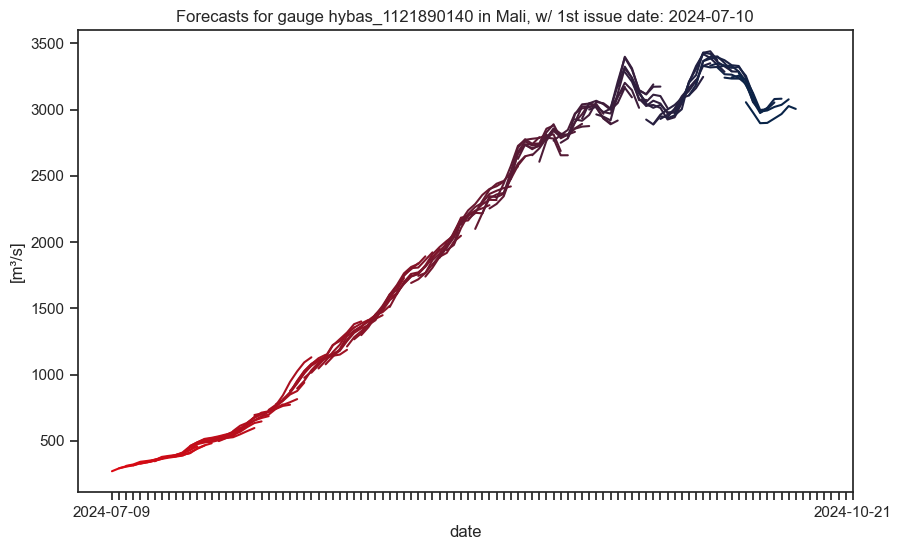

In [13]:
start_date = datetime.datetime.now() - datetime.timedelta(days = 90)

plot_x_days_of_gauge_forecast_for_issue_time(
    df_Mali_forecasts,                      # plot for Mali
    df_Mali_gauges['gaugeId'].to_list()[0], # plot for the first gauge
    start_date,                             # plot starts 90 days ago (relative to today)
    90,                                     # plot for 90 days (relative to start date)                                                  
    'Mali',                                 # country name (don't forget the capital letter)
)

# **Explorative statistics**

In [14]:
from extract_data.plots import set_plot_style
from extract_data.plots import get_custom_palette
from extract_data.plots import set_custom_date_ticks
from extract_data.plots import make_subset_for_gauge_and_issue_time


def get_stats_for_forecast_range(
        df: pd.DataFrame,
        issue_time: datetime.datetime,
        gauge_ID: str,
        delta: int,
        stat: str
    ) -> pd.Series:
    """
    Gets a dataframe with forecasts, an issue time, gauge ID, and delta
    and transform and aggregates the forecast values within that range
    into a chosen statistic, resulting in one value per date. Options:
    'min' : get minimum forecast value
    'max' : get maximum forecast value
    'mean': get mean forecast value
    'dev' : get standard deviation of forecast values
    'var' : get variance of forecast values

    :param df: dataframe containing forecasts, with for each issue time
               a seven-day forecast per gauge
    :param issue_time: issue time of the forecast to be taken
    :param delta: time delta in days from the issue time
    :param stat: which statistic to calculate
    :return: a pd.Series with the chosen statistic per date
    """
    if issue_time + datetime.timedelta(days = delta + 4) > pd.to_datetime(df['fc_date'].max()):
        raise ValueError("Issue time + delta exceeds the max forecasted date in the dataframe")

    df = df.copy()
    dfs = []
    for idx in range(0, delta):
        dfs.append(make_subset_for_gauge_and_issue_time(
            df,
            gauge_ID,
            issue_time.replace(hour = 0,
                               minute = 0,
                               second = 0,
                               microsecond = 0) + datetime.timedelta(days = idx)
            )
        )

    # With the list of dfs, we now need to aggregate them such
    # that all datapoints with the same date are grouped together,
    # to then calculate the chosen statistic
    grouped = pd.concat(dfs).groupby('issue_date')['fc_value']

    if stat == 'min':
        return grouped.min()
    elif stat == 'max':
        return grouped.max()
    elif stat == 'mean':
        return grouped.mean()
    elif stat == 'dev':
        return grouped.std()
    elif stat == 'var':
        return grouped.var()
    else:
        raise ValueError(f"Statistic {stat} not recognized")
    

def z_normalise(series: pd.Series) -> pd.Series:
    """
    Z-normalises a series by subtracting the mean and dividing by the standard deviation

    :param series: the series to be normalised
    :return: the normalised series
    """
    return (series - series.mean()) / series.std()

In [15]:
def plot_forecast_min_mean_max(
        df: pd.DataFrame,
        issue_date: datetime.datetime,
        gauge: str,
        delta: int) -> None:
    """
    Plots the minimum, mean, and maximum forecast values
    for a given gauge and issue time, for a given number of days
    after the issue time

    :param df: dataframe containing forecasts, with for each issue time
               a seven-day forecast per gauge
    :param issue_date: issue date/time of the forecast to be taken
    :param gauge: gauge ID for which to plot the forecast
    :param delta: time delta in days from the issue time
    """
    set_plot_style()
    plt.figure(figsize = (10, 6))
    custom_palette = get_custom_palette(3)
    
    min_values = get_stats_for_forecast_range(df, issue_date, gauge, delta, 'min')
    mean_values = get_stats_for_forecast_range(df, issue_date, gauge, delta, 'mean')
    max_values = get_stats_for_forecast_range(df, issue_date, gauge, delta, 'max')

    sns.lineplot(
        x = min_values.index,
        y = min_values,
        label = 'min',
        color = custom_palette[0]
    )
    sns.lineplot(
        x = mean_values.index,
        y = mean_values,
        label = 'mean',
        color = custom_palette[1]
    )
    sns.lineplot(
        x = max_values.index,
        y = max_values,
        label = 'max',
        color = custom_palette[2]
    )

    plt.xticks(rotation = 45)
    plt.title(f"Forecast for gauge {gauge} issued on {str(issue_date)[:10]}")
    plt.xlabel("Date")
    plt.ylabel("Cubic meters per second")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [16]:
def plot_Niger_river_downstream_flow_stat(
        df: pd.DataFrame,
        issue_date: datetime.datetime,
        gauges: list,
        delta: int,
        stat) -> None:
    """
    Plots a statistic of choice for the gauges along the Niger river
    in Mali in downstream order. The statistic is calculated for a
    given number of days after the issue time. Each gauge has its
    volume normalised to account for the different local volumes

    :param df: dataframe containing forecasts, with for each issue time
                a seven-day forecast per gauge
    :param issue_date: issue date/time of the forecast to be taken
    :param gauges: list of gauge IDs for which to plot the forecast
    :param delta: time delta in days from the issue time
    :param stat: which statistic to calculate
    """
    set_plot_style()
    plt.figure(figsize = (10, 6))
    custom_palette = get_custom_palette(len(gauges))

    for idx, gauge in enumerate(gauges):
        values = z_normalise(
            get_stats_for_forecast_range(
                df, issue_date, gauge, delta, stat
            )
        )
        sns.lineplot(
            x = values.index,
            y = values,
            label = gauge,
            color = custom_palette[idx]
        )
    
    plt.xticks(rotation = 45)
    plt.title(f"z-normalised {stat} forecast for gauges along the Niger river in Mali")
    plt.xlabel("date")
    plt.ylabel("z-normalised volume")
    plt.legend()
    plt.tight_layout()
    plt.show()

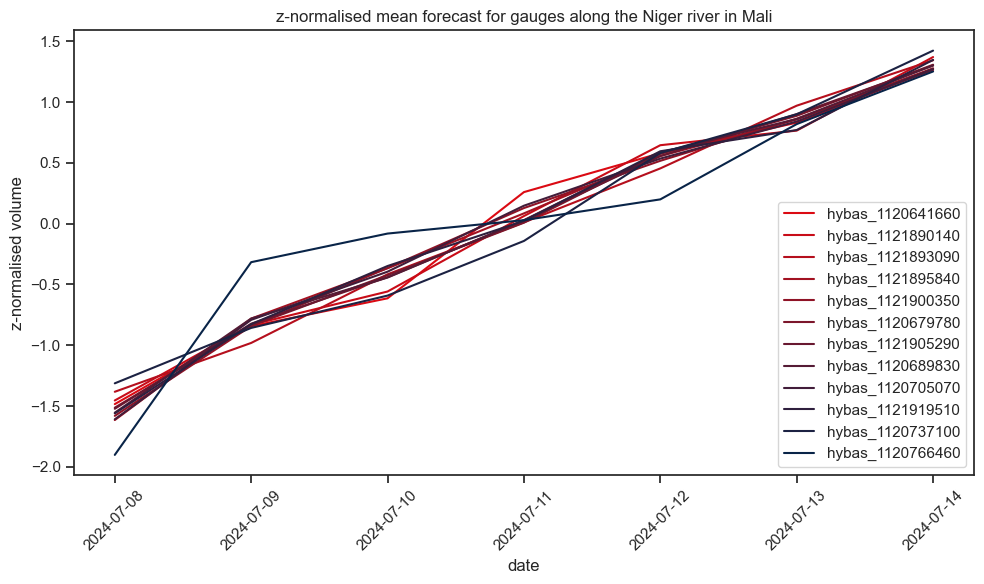

In [17]:
plot_Niger_river_downstream_flow_stat(
    df_Mali_forecasts,
    datetime.datetime(2024, 7, 8, 0, 0),
    df_Mali_gauges_Niger['gaugeId'].to_list(),
    7,
    'mean'
)

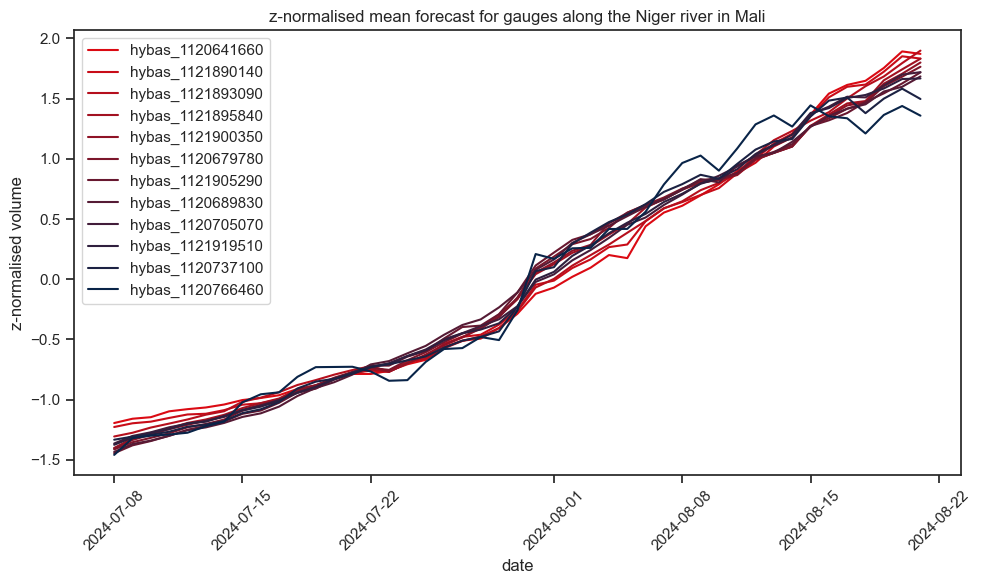

In [23]:
plot_Niger_river_downstream_flow_stat(
    df_Mali_forecasts,
    datetime.datetime(2024, 7, 8, 0, 0),
    df_Mali_gauges_Niger['gaugeId'].to_list(),
    45,
    'mean'
)

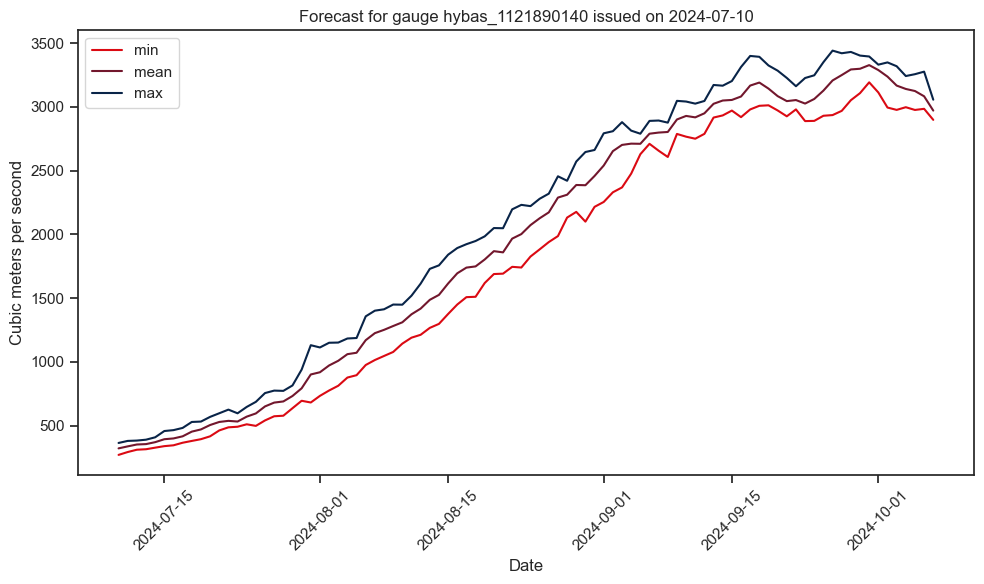

In [18]:
issue_time = datetime.datetime.now() - datetime.timedelta(days = 90)

plot_forecast_min_mean_max(
    df_Mali_forecasts,
    issue_time,
    df_Mali_gauges['gaugeId'].to_list()[0],
    90
)

In [24]:
issue_time = datetime.datetime.now() - datetime.timedelta(days = 14)

print(
    get_stats_for_forecast_range(
        df_Mali_forecasts,
        issue_time,
        df_Mali_gauges_Niger['gaugeId'].iloc[0],
        7,
        'min'
    )
)

print(
    get_stats_for_forecast_range(
        df_Mali_forecasts,
        issue_time,
        df_Mali_gauges_Niger['gaugeId'].iloc[0],
        7,
        'mean'
    )
)

print(
    get_stats_for_forecast_range(
        df_Mali_forecasts,
        issue_time,
        df_Mali_gauges_Niger['gaugeId'].iloc[0],
        7,
        'max'
    )
)

print(
    get_stats_for_forecast_range
    (
        df_Mali_forecasts,
        issue_time,
        df_Mali_gauges_Niger['gaugeId'].iloc[0],
        7,
        'dev'
    )
)

print(
    get_stats_for_forecast_range(
        df_Mali_forecasts,
        issue_time,
        df_Mali_gauges_Niger['gaugeId'].iloc[0],
        7,
        'var'
    )
)

issue_date
2024-09-24    2837.632324
2024-09-25    2879.074707
2024-09-26    2899.147705
2024-09-27    2928.896240
2024-09-28    2993.315186
2024-09-29    2998.145264
2024-09-30    3075.324219
Name: fc_value, dtype: float64
issue_date
2024-09-24    2956.608093
2024-09-25    3009.965973
2024-09-26    3075.571808
2024-09-27    3119.692322
2024-09-28    3174.218903
2024-09-29    3192.986267
2024-09-30    3221.096710
Name: fc_value, dtype: float64
issue_date
2024-09-24    3087.976807
2024-09-25    3192.027344
2024-09-26    3277.413574
2024-09-27    3244.987549
2024-09-28    3254.437988
2024-09-29    3279.017334
2024-09-30    3284.891357
Name: fc_value, dtype: float64
issue_date
2024-09-24     74.781830
2024-09-25    112.782989
2024-09-26    159.675558
2024-09-27    118.268801
2024-09-28    102.594982
2024-09-29    100.678621
2024-09-30     66.466512
Name: fc_value, dtype: float64
issue_date
2024-09-24     5592.322068
2024-09-25    12720.002618
2024-09-26    25496.283770
2024-09-27    13987

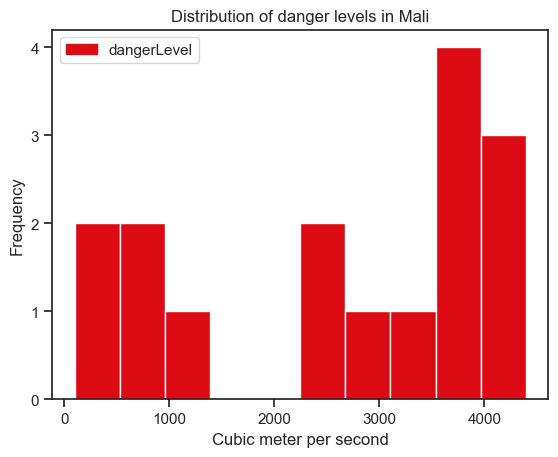

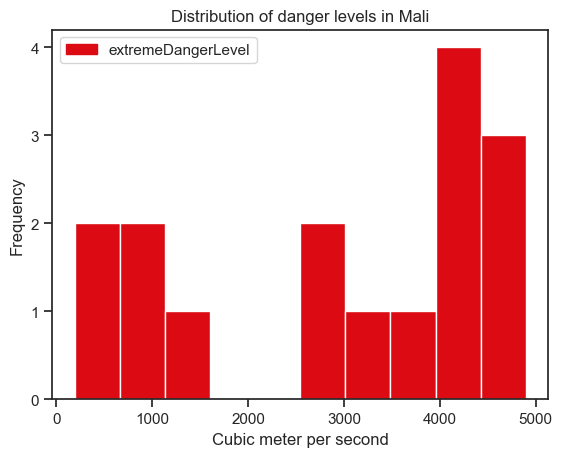

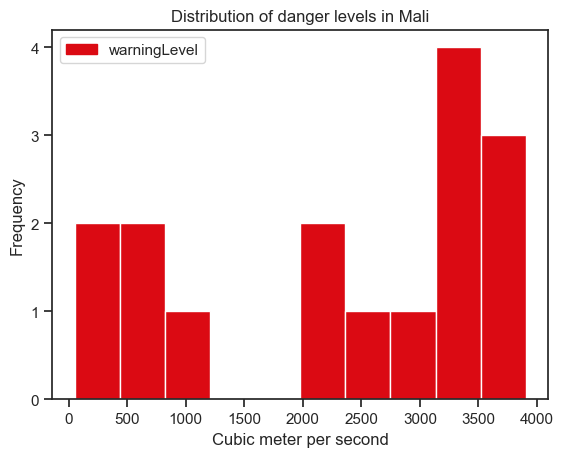

In [22]:
plot_danger_levels_hist(df_Mali_gauges, 'Mali')